In [1]:
import numpy as np
import pandas as pd
from numpy import genfromtxt
from copy import deepcopy
from pprint import pprint
import operator

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

np.random.seed = 42

## Dataset 2

In [2]:
data2 = pd.read_csv('datasets/housing_data.csv')
data2 = np.asarray(data2)

cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [3]:
data2.shape

(505, 14)

### Plot/visualize

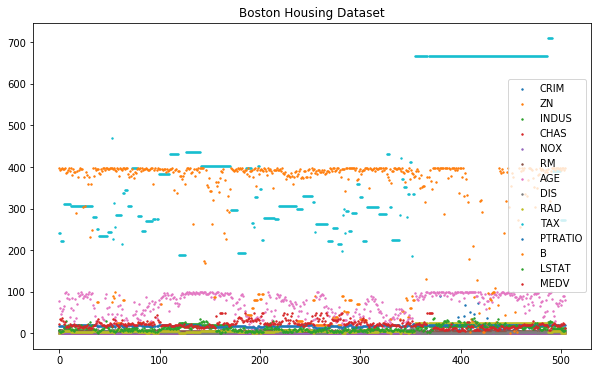

In [4]:
for idx, col in enumerate(cols):
    feature = data2[:, idx]
    plt.scatter(np.arange(len(feature)), feature, label=col, s=2)
    
plt.title('Boston Housing Dataset')
plt.legend()
plt.show()

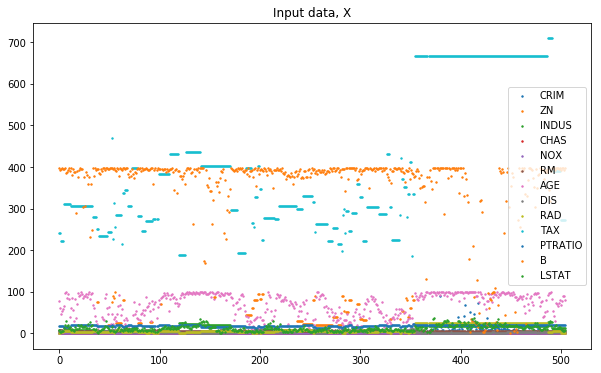

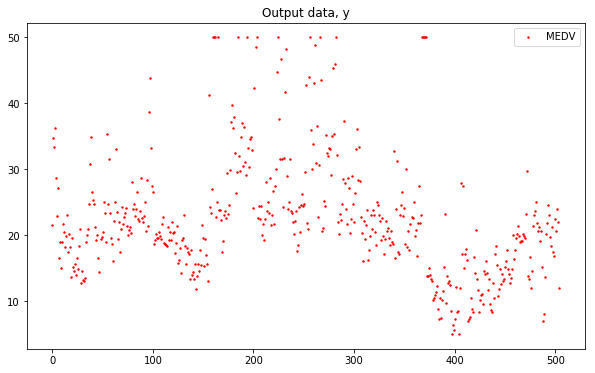

In [5]:
medv_idx = cols.index('MEDV')
y_ = data2[:, medv_idx]

data2_copy = np.copy(data2)
data2_copy = np.delete(data2_copy, medv_idx, axis=1)

X_ = data2_copy

for idx, col in enumerate(cols):
    if idx == medv_idx:
        pass
    elif idx > medv_idx:
        feature = X_[:, idx-1]
        plt.scatter(np.arange(len(feature)), feature, label=col, s=2)
    else:
        feature = X_[:, idx]
        plt.scatter(np.arange(len(feature)), feature, label=col, s=2)
    
plt.title('Input data, X')
plt.legend()
plt.show()

plt.scatter(np.arange(len(y_)), y_, label='MEDV', s=2, c='r')
plt.title('Output data, y')
plt.legend()
plt.show()

### Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def rmse(y_1, y_2):
    return np.sqrt(mean_squared_error(y_1, y_2))

In [7]:
# randomly shuffling arrays
p = np.random.RandomState(seed=42).permutation(X_.shape[0])
X = X_[p]
y = y_[p]

print(X.shape)
print(X)
print(y.shape)

(505, 13)
[[8.44700e-02 0.00000e+00 4.05000e+00 ... 1.66000e+01 3.93230e+02
  9.64000e+00]
 [9.60400e-02 4.00000e+01 6.41000e+00 ... 1.76000e+01 3.96900e+02
  2.98000e+00]
 [1.05740e-01 0.00000e+00 2.77400e+01 ... 2.01000e+01 3.90110e+02
  1.80700e+01]
 ...
 [2.89900e-02 4.00000e+01 1.25000e+00 ... 1.97000e+01 3.89850e+02
  5.89000e+00]
 [1.44208e+01 0.00000e+00 1.81000e+01 ... 2.02000e+01 2.74900e+01
  1.80500e+01]
 [2.11610e-01 0.00000e+00 8.56000e+00 ... 2.09000e+01 3.94470e+02
  1.34400e+01]]
(505,)


##### Vanilla Linear Regression

In [8]:
model = LinearRegression()

kf = KFold(n_splits=10)
rmse_per_fold_train = []
rmse_per_fold_test = []
i = 0
for trainset, testset in kf.split(X):
    X_train, X_test = X[trainset], X[testset]
    y_train, y_test = y[trainset], y[testset]
    model.fit(X_train, y_train)
    rmse_per_fold_train.append(rmse(y_train, model.predict(X_train)))
    rmse_per_fold_test.append(rmse(y_test, model.predict(X_test)))
    print('RMSE Training for fold {} = {}'.format(i, rmse(y_train, model.predict(X_train))))
    print('RMSE Testing for fold {} = {}'.format(i, rmse(y_test, model.predict(X_test))))
    i = i + 1
    
rmse_avg_train = np.average(rmse_per_fold_train)
rmse_avg_test = np.average(rmse_per_fold_test)

print('--')
print('RMSE Training average = {}'.format(rmse_avg_train))
print('RMSE Testing average  = {}'.format(rmse_avg_test))

model.fit(X, y)
rmse_val = rmse(model.predict(X), y)
print('RMSE overall = {}'.format(rmse_val))

RMSE Training for fold 0 = 4.762370857276623
RMSE Testing for fold 0 = 3.9481576460836587
RMSE Training for fold 1 = 4.674921961040921
RMSE Testing for fold 1 = 4.796773875510282
RMSE Training for fold 2 = 4.741497686012299
RMSE Testing for fold 2 = 4.12090436458985
RMSE Training for fold 3 = 4.717005083449586
RMSE Testing for fold 3 = 4.335959936097897
RMSE Training for fold 4 = 4.581049920397351
RMSE Testing for fold 4 = 5.528341235215408
RMSE Training for fold 5 = 4.5309514539511015
RMSE Testing for fold 5 = 5.917499170270757
RMSE Training for fold 6 = 4.562361677148412
RMSE Testing for fold 6 = 5.65295613471051
RMSE Training for fold 7 = 4.710345749923824
RMSE Testing for fold 7 = 4.460260400208903
RMSE Training for fold 8 = 4.762366723664201
RMSE Testing for fold 8 = 3.9455696843044903
RMSE Training for fold 9 = 4.61988727744563
RMSE Testing for fold 9 = 5.302986123959749
--
RMSE Training average = 4.666275839030995
RMSE Testing average  = 4.80094085709515
RMSE overall = 4.6760645

In [9]:
print(model.coef_)
print(np.max(model.coef_))
print(np.min(model.coef_))

[-1.07416993e-01  4.61207350e-02  1.42689710e-02  2.67110782e+00
 -1.76336414e+01  3.79430680e+00  1.07616131e-03 -1.47917943e+00
  3.01534125e-01 -1.20534342e-02 -9.58873592e-01  9.30540151e-03
 -5.27599617e-01]
3.794306798163207
-17.633641354369583


##### Finding significance of each feature

In [10]:
rmse_sig_train = {}
rmse_sig_test = {}

cols_trimmed = deepcopy(cols)
del cols_trimmed[cols_trimmed.index('MEDV')]

for i in range(X.shape[1]):
    # remove this column from X:
    X_trimmed = np.delete(X, np.s_[i:i+1], axis=1)
    
    # perform 10-fold cross-validation, saving the averaged result:
    model = LinearRegression()

    kf = KFold(n_splits=10)
    rmse_per_fold_train = []
    rmse_per_fold_test = []
    
    for trainset, testset in kf.split(X):
        X_train, X_test = X_trimmed[trainset], X_trimmed[testset]
        y_train, y_test = y[trainset], y[testset]
        model.fit(X_train, y_train)
        rmse_per_fold_train.append(rmse(y_train, model.predict(X_train)))
        rmse_per_fold_test.append(rmse(y_test, model.predict(X_test)))

    rmse_sig_train[cols_trimmed[i]] = np.average(rmse_per_fold_train)
    rmse_sig_test[cols_trimmed[i]] = np.average(rmse_per_fold_test)
    
print('Training RMSE when removing each variable:')
pprint(rmse_sig_train)
print('')

print('Testing RMSE when removing each variable:')
pprint(rmse_sig_test)

print('')
print('Original RMSE: {}'.format(rmse_avg_test))
sorted_x = sorted(rmse_sig_test.items(), key=operator.itemgetter(1), reverse=True)
pprint(sorted_x)

Training RMSE when removing each variable:
{'AGE': 4.66704719200498,
 'B': 4.7235550797075545,
 'CHAS': 4.712698217609509,
 'CRIM': 4.717403883141196,
 'DIS': 4.921493116376378,
 'INDUS': 4.666637551624738,
 'LSTAT': 5.155799090980475,
 'NOX': 4.766311198693076,
 'PTRATIO': 4.915974859606436,
 'RAD': 4.763841894912896,
 'RM': 5.044024648894501,
 'TAX': 4.715562466652167,
 'ZN': 4.7206792030604}

Testing RMSE when removing each variable:
{'AGE': 4.786079771474054,
 'B': 4.846244695022284,
 'CHAS': 4.834664880498587,
 'CRIM': 4.842644473774397,
 'DIS': 5.0586348092885265,
 'INDUS': 4.798959818097281,
 'LSTAT': 5.230627464149353,
 'NOX': 4.913716651787877,
 'PTRATIO': 5.025805811721874,
 'RAD': 4.869224111228442,
 'RM': 5.183219953804661,
 'TAX': 4.822900122469634,
 'ZN': 4.832094413235347}

Original RMSE: 4.80094085709515
[('LSTAT', 5.230627464149353),
 ('RM', 5.183219953804661),
 ('DIS', 5.0586348092885265),
 ('PTRATIO', 5.025805811721874),
 ('NOX', 4.913716651787877),
 ('RAD', 4.869224

LSTAT, RM, and DIS are the 3 variables with the most impact to the model, because they raise the RMSE the highest when removed from training.

##### Measuring significance using p and t values

In [11]:
# using code from this source:
# https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression

from scipy import stats

model = LinearRegression()
model.fit(X,y)
params = np.append(model.intercept_,model.coef_)
predictions = model.predict(X)

newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX.columns))

# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["p values"] = [params,sd_b,ts_b,p_values]

# print(len(params))
# print(len(cols_trimmed))
myDF3["Variables"] = ["const"] + cols_trimmed
myDF3 = myDF3.set_index("Variables")

print(myDF3)

           Coefficients  Standard Errors  t values  p values
Variables                                                   
const           36.6349            5.102     7.180     0.000
CRIM            -0.1074            0.033    -3.270     0.001
ZN               0.0461            0.014     3.361     0.001
INDUS            0.0143            0.062     0.231     0.817
CHAS             2.6711            0.861     3.102     0.002
NOX            -17.6336            3.819    -4.618     0.000
RM               3.7943            0.418     9.081     0.000
AGE              0.0011            0.013     0.081     0.935
DIS             -1.4792            0.199    -7.420     0.000
RAD              0.3015            0.066     4.541     0.000
TAX             -0.0121            0.004    -3.202     0.001
PTRATIO         -0.9589            0.131    -7.329     0.000
B                0.0093            0.003     3.467     0.001
LSTAT           -0.5276            0.051   -10.400     0.000


INDUS and AGE have very high p values, indicating that it is very likely these factors play little role in the regression model.

The t values for the other variables are all far from zero, indicating that they are important to the model. The most important three are LSTAT, RM, and DIS (as was found in the previous test).

##### Scatter Plots

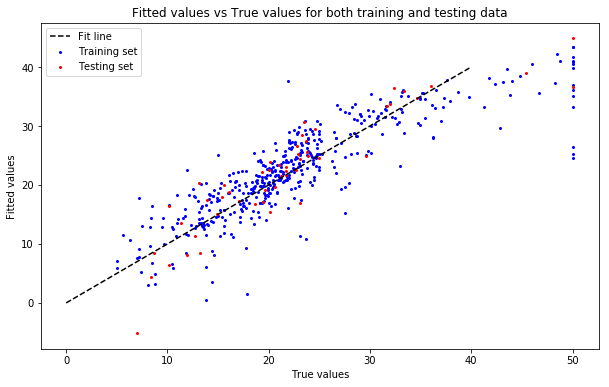

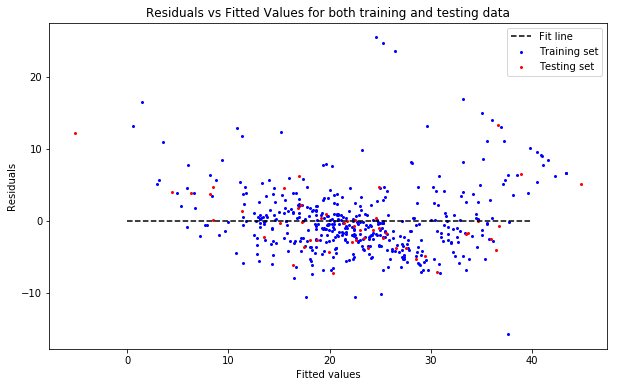

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
model.fit(X_train, y_train)

# Fitted values vs true values
plt.figure()
plt.scatter(y_train, model.predict(X_train), c='b', s=4, alpha=1)
plt.scatter(y_test, model.predict(X_test), c='r', s=4, alpha=1)
plt.plot(np.linspace(0, 40, 1000), np.linspace(0, 40, 1000), '--k')
plt.title('Fitted values vs True values for both training and testing data')
plt.xlabel('True values')
plt.ylabel('Fitted values')
l = plt.legend(['Fit line', 'Training set', 'Testing set'])

# Residuals vs Fitted values
plt.figure()
plt.scatter(model.predict(X_train), y_train - model.predict(X_train), c='b', s=4, alpha=1)
plt.scatter(model.predict(X_test), y_test - model.predict(X_test), c='r', s=4, alpha=1)
plt.plot(np.linspace(0, 40, 1000), [0 for _ in np.linspace(0, 40, 1000)], '--k')
plt.title('Residuals vs Fitted Values for both training and testing data')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
l = plt.legend(['Fit line', 'Training set', 'Testing set'])

### Linear Regression with Regularization

##### LR with Ridge Regularization

Find best alpha

RMSE Testing for alpha=0 = 4.800940857095156
RMSE Testing for alpha=0.0001 = 4.800941251215717
RMSE Testing for alpha=0.001 = 4.80094484757032
RMSE Testing for alpha=0.01 = 4.800985616255072
RMSE Testing for alpha=0.02 = 4.80104086026172
RMSE Testing for alpha=0.03 = 4.801106126048789
RMSE Testing for alpha=0.04 = 4.801180970378094
RMSE Testing for alpha=0.05 = 4.801264968910954
RMSE Testing for alpha=0.1 = 4.801808638554261
RMSE Testing for alpha=0.5 = 4.810106650081877
RMSE Testing for alpha=1.0 = 4.822413086716423
RMSE Testing for alpha=2.5 = 4.849324863192508
RMSE Testing for alpha=5.0 = 4.871752770780406
RMSE Testing for alpha=10.0 = 4.891312481713745
RMSE Testing for alpha=50.0 = 4.951351082779712
RMSE Testing for alpha=100.0 = 5.009337398815051
RMSE Testing for alpha=1000.0 = 5.358846116977942
RMSE Testing for alpha=10000.0 = 6.098809654327523


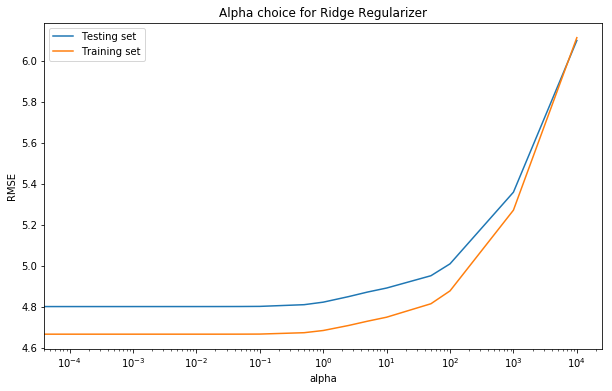

In [13]:
alphas = [0, 0.0001, 0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.5, 1.0, 2.5, 5.0, 10.0, 50.0, 100.0, 1000.0, 10000.0]
rmse_avgs = []
rmse_avgs_train = []
for alpha in alphas:
    model = Ridge(alpha=alpha)

    kf = KFold(n_splits=10)
    rmse_per_fold_test = []
    rmse_per_fold_train = []
    for trainset, testset in kf.split(X):
        X_train, X_test = X[trainset], X[testset]
        y_train, y_test = y[trainset], y[testset]
        model.fit(X_train, y_train)
        rmse_per_fold_test.append(rmse(y_test, model.predict(X_test)))
        rmse_per_fold_train.append(rmse(y_train, model.predict(X_train)))

    rmse_avgs.append(np.average(rmse_per_fold_test))
    rmse_avgs_train.append(np.average(rmse_per_fold_train))
    
for idx, alpha in enumerate(alphas):
    print('RMSE Testing for alpha={} = {}'.format(alpha, rmse_avgs[idx]))
    
plt.semilogx(alphas, rmse_avgs)
plt.semilogx(alphas, rmse_avgs_train)
plt.title('Alpha choice for Ridge Regularizer')
plt.ylabel('RMSE')
plt.xlabel('alpha')
l = plt.legend(['Testing set', 'Training set'])
plt.show()

In [14]:
alpha = 1000
model = Ridge(alpha=alpha)

kf = KFold(n_splits=10)
rmse_per_fold_train = []
rmse_per_fold_test = []
i = 0
for trainset, testset in kf.split(X):
    X_train, X_test = X[trainset], X[testset]
    y_train, y_test = y[trainset], y[testset]
    model.fit(X_train, y_train)
    rmse_per_fold_train.append(rmse(y_train, model.predict(X_train)))
    rmse_per_fold_test.append(rmse(y_test, model.predict(X_test)))
    print('RMSE Training for fold {} = {}'.format(i, rmse(y_train, model.predict(X_train))))
    print('RMSE Testing for fold {} = {}'.format(i, rmse(y_test, model.predict(X_test))))
    i = i + 1
    
rmse_avg_train = np.average(rmse_per_fold_train)
rmse_avg_test = np.average(rmse_per_fold_test)

print('--')
print('RMSE Training average = {}'.format(rmse_avg_train))
print('RMSE Testing average  = {}'.format(rmse_avg_test))

model.fit(X, y)
rmse_val = rmse(model.predict(X), y)
print('RMSE overall = {}'.format(rmse_val))

RMSE Training for fold 0 = 5.37945299183319
RMSE Testing for fold 0 = 3.9880446516570647
RMSE Training for fold 1 = 5.3140018563906315
RMSE Testing for fold 1 = 4.997144558551308
RMSE Training for fold 2 = 5.304805569193197
RMSE Testing for fold 2 = 5.114779004153415
RMSE Training for fold 3 = 5.303653083156734
RMSE Testing for fold 3 = 4.96021266696495
RMSE Training for fold 4 = 5.210959073521185
RMSE Testing for fold 4 = 6.057007900679907
RMSE Training for fold 5 = 5.143159456162191
RMSE Testing for fold 5 = 6.648293879649454
RMSE Training for fold 6 = 5.1702878340594305
RMSE Testing for fold 6 = 6.305467905339727
RMSE Training for fold 7 = 5.272758015692992
RMSE Testing for fold 7 = 5.68458043398909
RMSE Training for fold 8 = 5.369633952246094
RMSE Testing for fold 8 = 4.331650526629797
RMSE Training for fold 9 = 5.242841516946537
RMSE Testing for fold 9 = 5.501279642164699
--
RMSE Training average = 5.271155334920219
RMSE Testing average  = 5.358846116977942
RMSE overall = 5.255516

In [15]:
print(model.coef_)
print(np.max(model.coef_))
print(np.min(model.coef_))

[-0.0901827   0.05399343 -0.04151876  0.10095322 -0.01569573  0.56670037
  0.03111852 -0.61482399  0.30635084 -0.01631973 -0.664214    0.0079832
 -0.76573723]
0.5667003735502105
-0.7657372321760025


##### Scatter Plots

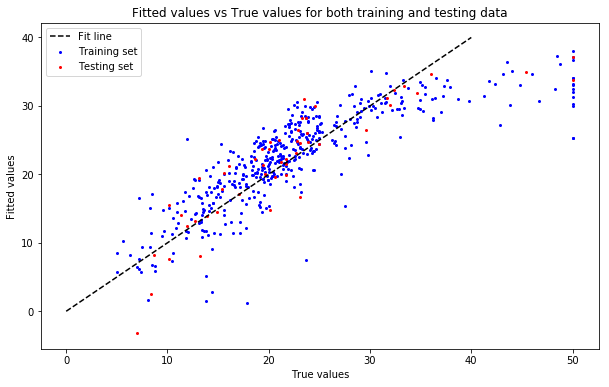

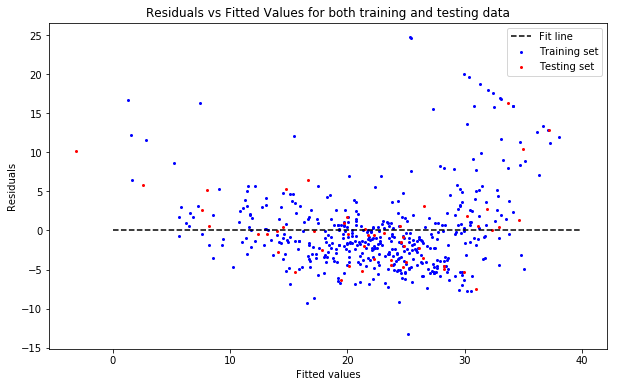

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
model.fit(X_train, y_train)

# Fitted values vs true values
plt.figure()
plt.scatter(y_train, model.predict(X_train), c='b', s=4, alpha=1)
plt.scatter(y_test, model.predict(X_test), c='r', s=4, alpha=1)
plt.plot(np.linspace(0, 40, 1000), np.linspace(0, 40, 1000), '--k')
plt.title('Fitted values vs True values for both training and testing data')
plt.xlabel('True values')
plt.ylabel('Fitted values')
l = plt.legend(['Fit line', 'Training set', 'Testing set'])

# Residuals vs Fitted values
plt.figure()
plt.scatter(model.predict(X_train), y_train - model.predict(X_train), c='b', s=4, alpha=1)
plt.scatter(model.predict(X_test), y_test - model.predict(X_test), c='r', s=4, alpha=1)
plt.plot(np.linspace(0, 40, 1000), [0 for _ in np.linspace(0, 40, 1000)], '--k')
plt.title('Residuals vs Fitted Values for both training and testing data')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
l = plt.legend(['Fit line', 'Training set', 'Testing set'])

##### LR with Lasso Regularization

Find best alpha

RMSE Testing for alpha=0.0001 = 4.80096957067631
RMSE Testing for alpha=0.001 = 4.80126637969814
RMSE Testing for alpha=0.01 = 4.807832447201066
RMSE Testing for alpha=0.02 = 4.823396201971581
RMSE Testing for alpha=0.03 = 4.847127530161303
RMSE Testing for alpha=0.04 = 4.878900894305857
RMSE Testing for alpha=0.05 = 4.915607852381946
RMSE Testing for alpha=0.1 = 4.943410787963481
RMSE Testing for alpha=0.5 = 5.023593270218159
RMSE Testing for alpha=1.0 = 5.277018544312496
RMSE Testing for alpha=2.5 = 5.784640309749543
RMSE Testing for alpha=5.0 = 6.077637467385353
RMSE Testing for alpha=10.0 = 6.30355803173426
RMSE Testing for alpha=50.0 = 7.97517803171382
RMSE Testing for alpha=100.0 = 8.028706961780538
RMSE Testing for alpha=1000.0 = 9.111789922213587
RMSE Testing for alpha=10000.0 = 9.111789922213587


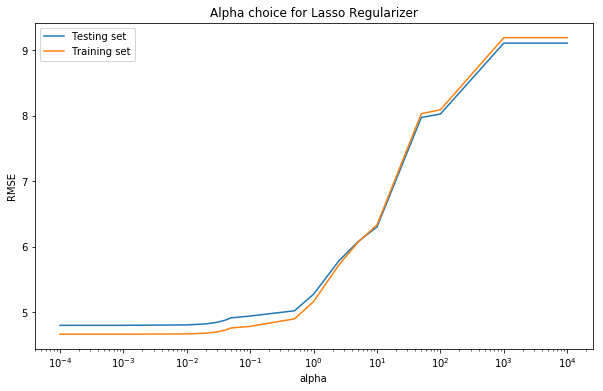

In [17]:
alphas = [0.0001, 0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.5, 1.0, 2.5, 5.0, 10.0, 50.0, 100.0, 1e3, 1e4]
rmse_avgs = []
rmse_avgs_train = []
for alpha in alphas:
    model = Lasso(alpha=alpha)

    kf = KFold(n_splits=10)
    rmse_per_fold_test = []
    rmse_per_fold_train = []
    for trainset, testset in kf.split(X):
        X_train, X_test = X[trainset], X[testset]
        y_train, y_test = y[trainset], y[testset]
        model.fit(X_train, y_train)
        rmse_per_fold_test.append(rmse(y_test, model.predict(X_test)))
        rmse_per_fold_train.append(rmse(y_train, model.predict(X_train)))

    rmse_avgs.append(np.average(rmse_per_fold_test))
    rmse_avgs_train.append(np.average(rmse_per_fold_train))
    
for idx, alpha in enumerate(alphas):
    print('RMSE Testing for alpha={} = {}'.format(alpha, rmse_avgs[idx]))
    
plt.semilogx(alphas, rmse_avgs)
plt.semilogx(alphas, rmse_avgs_train)
plt.title('Alpha choice for Lasso Regularizer')
plt.ylabel('RMSE')
plt.xlabel('alpha')
l = plt.legend(['Testing set', 'Training set'])
plt.show()

In [18]:
alpha = 1e1
model = Lasso(alpha=alpha)

kf = KFold(n_splits=10)
rmse_per_fold_train = []
rmse_per_fold_test = []
i = 0
for trainset, testset in kf.split(X):
    X_train, X_test = X[trainset], X[testset]
    y_train, y_test = y[trainset], y[testset]
    model.fit(X_train, y_train)
    rmse_per_fold_train.append(rmse(y_train, model.predict(X_train)))
    rmse_per_fold_test.append(rmse(y_test, model.predict(X_test)))
    print('RMSE Training for fold {} = {}'.format(i, rmse(y_train, model.predict(X_train))))
    print('RMSE Testing for fold {} = {}'.format(i, rmse(y_test, model.predict(X_test))))
    i = i + 1
    
rmse_avg_train = np.average(rmse_per_fold_train)
rmse_avg_test = np.average(rmse_per_fold_test)

print('--')
print('RMSE Training average = {}'.format(rmse_avg_train))
print('RMSE Testing average  = {}'.format(rmse_avg_test))

model.fit(X, y)
rmse_val = rmse(model.predict(X), y)
print('RMSE overall = {}'.format(rmse_val))

RMSE Training for fold 0 = 6.517004463467118
RMSE Testing for fold 0 = 3.6490833847159982
RMSE Training for fold 1 = 6.360681568820384
RMSE Testing for fold 1 = 5.981328170014374
RMSE Training for fold 2 = 6.345034886239524
RMSE Testing for fold 2 = 6.214012718313031
RMSE Training for fold 3 = 6.407057550113585
RMSE Testing for fold 3 = 5.758011937606566
RMSE Training for fold 4 = 6.230509869476638
RMSE Testing for fold 4 = 7.489838817844518
RMSE Training for fold 5 = 6.1949999552537625
RMSE Testing for fold 5 = 8.07852052567121
RMSE Training for fold 6 = 6.219667641459133
RMSE Testing for fold 6 = 7.531554765573903
RMSE Training for fold 7 = 6.249739293304129
RMSE Testing for fold 7 = 7.2396320400766765
RMSE Training for fold 8 = 6.456601406556096
RMSE Testing for fold 8 = 5.1986271055789155
RMSE Training for fold 9 = 6.369509360558589
RMSE Testing for fold 9 = 5.894970851947416
--
RMSE Training average = 6.335080599524896
RMSE Testing average  = 6.30355803173426
RMSE overall = 6.3437

In [19]:
print(model.coef_)
print(np.max(model.coef_))
print(np.min(model.coef_))

[-0.          0.02606219 -0.          0.          0.          0.
  0.         -0.          0.         -0.00927861 -0.          0.00749356
 -0.5659099 ]
0.026062189675908582
-0.5659098951827916


##### Scatter Plots

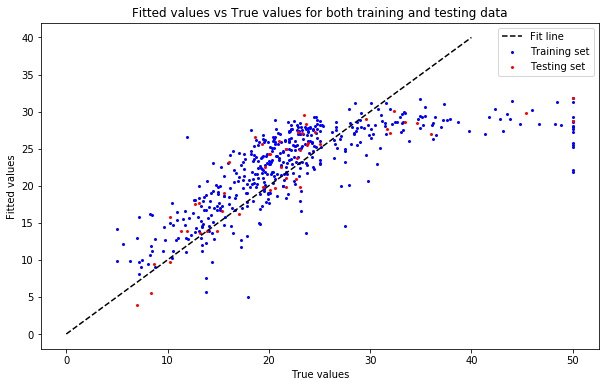

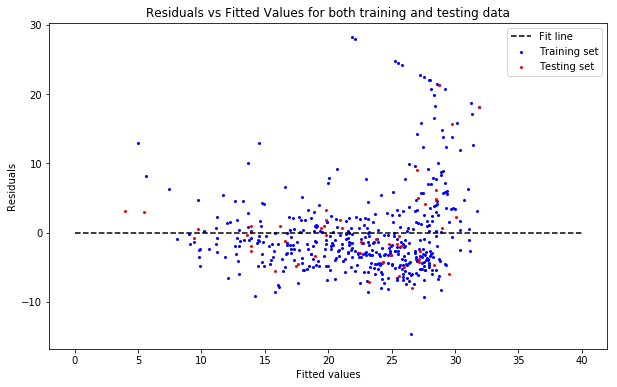

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
model.fit(X_train, y_train)

# Fitted values vs true values
plt.figure()
plt.scatter(y_train, model.predict(X_train), c='b', s=4, alpha=1)
plt.scatter(y_test, model.predict(X_test), c='r', s=4, alpha=1)
plt.plot(np.linspace(0, 40, 1000), np.linspace(0, 40, 1000), '--k')
plt.title('Fitted values vs True values for both training and testing data')
plt.xlabel('True values')
plt.ylabel('Fitted values')
l = plt.legend(['Fit line', 'Training set', 'Testing set'])

# Residuals vs Fitted values
plt.figure()
plt.scatter(model.predict(X_train), y_train - model.predict(X_train), c='b', s=4, alpha=1)
plt.scatter(model.predict(X_test), y_test - model.predict(X_test), c='r', s=4, alpha=1)
plt.plot(np.linspace(0, 40, 1000), [0 for _ in np.linspace(0, 40, 1000)], '--k')
plt.title('Residuals vs Fitted Values for both training and testing data')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
l = plt.legend(['Fit line', 'Training set', 'Testing set'])

##### LR with Elastic Net Regularization

Find best alpha

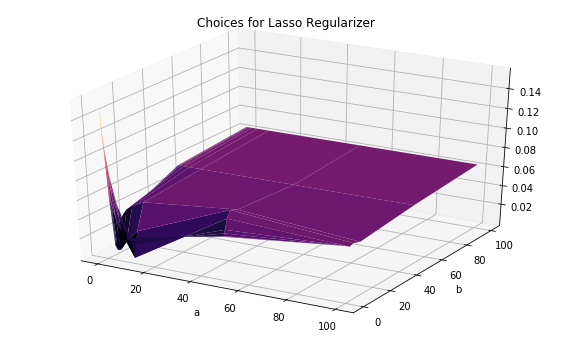

In [21]:
a_s = [0.0001, 0.0005, 0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.5, 1.0, 2.5, 5.0, 10.0, 50.0, 100.0]
b_s = [0.0001, 0.0005, 0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.5, 1.0, 2.5, 5.0, 10.0, 50.0, 100.0]
rmse_avgs = np.zeros((len(a_s), len(b_s)))
rmse_avgs_train = np.zeros((len(a_s), len(b_s)))
for adx, a in enumerate(a_s):
    for bdx, b in enumerate(b_s):
        alpha = a + b
        l1_ratio = a / (a + b)
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

        kf = KFold(n_splits=10)
        rmse_per_fold_test = []
        rmse_per_fold_train = []
        for trainset, testset in kf.split(X):
            X_train, X_test = X[trainset], X[testset]
            y_train, y_test = y[trainset], y[testset]
            model.fit(X_train, y_train)
            rmse_per_fold_test.append(rmse(y_test, model.predict(X_test)))
            rmse_per_fold_train.append(rmse(y_train, model.predict(X_train)))

        rmse_avgs[adx, bdx] = np.average(rmse_per_fold_test)
        rmse_avgs_train[adx, bdx] = np.average(rmse_per_fold_train)
        
from mpl_toolkits import mplot3d

def f1(x, y):
    ret = np.zeros((len(x), len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            ret[i][j] = rmse_avgs[i][j]
    return ret

def f2(x, y):
    ret = np.zeros((len(x), len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            ret[i][j] = rmse_avgs_train[i][j] - rmse_avgs[i][j]
    return ret

X_mesh, Y_mesh = np.meshgrid(a_s, b_s)
Z1 = f1(X_mesh, Y_mesh)
Z2 = f2(X_mesh, Y_mesh)

ax = plt.axes(projection='3d')
# ax.plot_surface(X_mesh, Y_mesh, Z1, rstride=1, cstride=1,
#                 cmap='viridis', edgecolor='none', alpha=0.5)
ax.plot_surface(X_mesh, Y_mesh, np.abs(Z2), rstride=1, cstride=1,
                cmap='inferno', edgecolor='none')

plt.ylabel('b')
plt.xlabel('a')
ax.set_title('Choices for Lasso Regularizer')
plt.show()

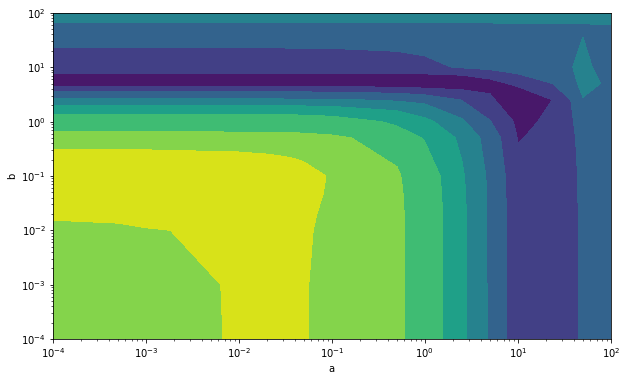

Best values: a=2.5, b=10.0
-0.00020612180642931577


In [22]:
ax2 = plt.axes()
ax2.set_xscale("log") 
ax2.set_yscale("log")

ax2.contourf(X_mesh, Y_mesh, np.abs(Z2))
plt.ylabel('b')
plt.xlabel('a')
plt.show()

ind = np.unravel_index(np.argmin(np.abs(Z2), axis=None), rmse_avgs.shape)
print("Best values: a={}, b={}".format(a_s[ind[0]], b_s[ind[1]]))
print(Z2[ind])

In [23]:
# a * L1 + b * L2
a = 2.5
b = 5.0

alpha = a + b
l1_ratio = a / (a + b)
model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)

kf = KFold(n_splits=10)
rmse_per_fold_train = []
rmse_per_fold_test = []
i = 0
for trainset, testset in kf.split(X):
    X_train, X_test = X[trainset], X[testset]
    y_train, y_test = y[trainset], y[testset]
    model.fit(X_train, y_train)
    rmse_per_fold_train.append(rmse(y_train, model.predict(X_train)))
    rmse_per_fold_test.append(rmse(y_test, model.predict(X_test)))
    print('RMSE Training for fold {} = {}'.format(i, rmse(y_train, model.predict(X_train))))
    print('RMSE Testing for fold {} = {}'.format(i, rmse(y_test, model.predict(X_test))))
    i = i + 1
    
rmse_avg_train = np.average(rmse_per_fold_train)
rmse_avg_test = np.average(rmse_per_fold_test)

print('--')
print('RMSE Training average = {}'.format(rmse_avg_train))
print('RMSE Testing average  = {}'.format(rmse_avg_test))

model.fit(X, y)
rmse_val = rmse(model.predict(X), y)
print('RMSE overall = {}'.format(rmse_val))

RMSE Training for fold 0 = 6.074814234532569
RMSE Testing for fold 0 = 3.744105573092277
RMSE Training for fold 1 = 5.980456070317208
RMSE Testing for fold 1 = 5.692078428281068
RMSE Training for fold 2 = 5.954049290761714
RMSE Testing for fold 2 = 5.852779323338639
RMSE Training for fold 3 = 5.988216540961446
RMSE Testing for fold 3 = 5.444069999563206
RMSE Training for fold 4 = 5.870353927264164
RMSE Testing for fold 4 = 6.976217429566504
RMSE Training for fold 5 = 5.784390833028223
RMSE Testing for fold 5 = 7.608484417151588
RMSE Training for fold 6 = 5.834413446390427
RMSE Testing for fold 6 = 7.098609190577948
RMSE Training for fold 7 = 5.908695535015484
RMSE Testing for fold 7 = 6.771462540524475
RMSE Training for fold 8 = 6.054985377983341
RMSE Testing for fold 8 = 4.728450355717827
RMSE Training for fold 9 = 5.943797622848893
RMSE Testing for fold 9 = 5.7094685506217635
--
RMSE Training average = 5.939417287910347
RMSE Testing average  = 5.9625725808435295
RMSE overall = 5.9462

In [24]:
print(model.coef_)
print(np.max(model.coef_))
print(np.min(model.coef_))

[-0.01491621  0.04434139 -0.          0.          0.          0.
  0.03506837 -0.          0.07991313 -0.01080054 -0.18684647  0.00746116
 -0.70196966]
0.07991313040120633
-0.7019696555071986


##### Scatter Plots

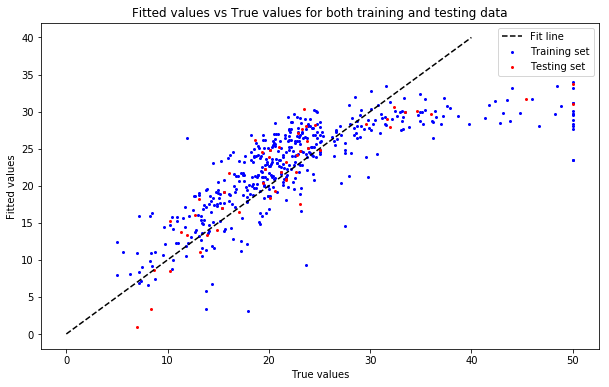

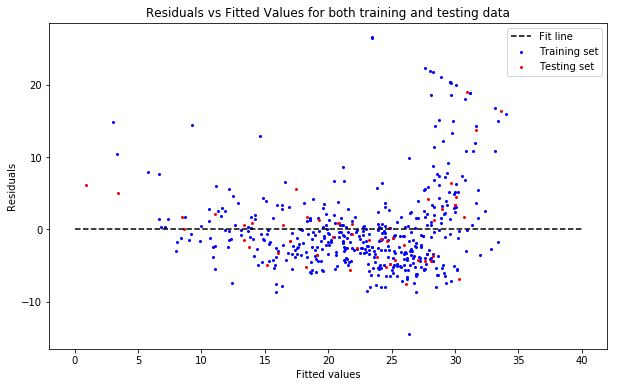

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
model.fit(X_train, y_train)

# Fitted values vs true values
plt.figure()
plt.scatter(y_train, model.predict(X_train), c='b', s=4, alpha=1)
plt.scatter(y_test, model.predict(X_test), c='r', s=4, alpha=1)
plt.plot(np.linspace(0, 40, 1000), np.linspace(0, 40, 1000), '--k')
plt.title('Fitted values vs True values for both training and testing data')
plt.xlabel('True values')
plt.ylabel('Fitted values')
l = plt.legend(['Fit line', 'Training set', 'Testing set'])

# Residuals vs Fitted values
plt.figure()
plt.scatter(model.predict(X_train), y_train - model.predict(X_train), c='b', s=4, alpha=1)
plt.scatter(model.predict(X_test), y_test - model.predict(X_test), c='r', s=4, alpha=1)
plt.plot(np.linspace(0, 40, 1000), [0 for _ in np.linspace(0, 40, 1000)], '--k')
plt.title('Residuals vs Fitted Values for both training and testing data')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
l = plt.legend(['Fit line', 'Training set', 'Testing set'])